# Self Organizing Maps 2

Use self organizing maps to approximate a solution to the traveling salesman problem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

from ann.plotting import subplots
from ann.som import som

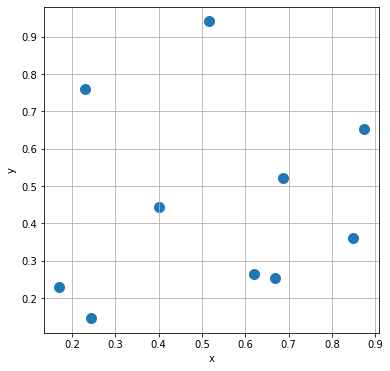

In [2]:
with open('../data/cities.dat', 'r') as f:
    clean = (line.replace(';', '') for line in f)
    cities = np.genfromtxt(clean, comments='%', delimiter=',')

_, ax = subplots(1, 1)

ax.scatter(*np.hsplit(cities, 2), s=100)

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.grid()

plt.show()

In [3]:
def plot_tour(scores, tour, weights, ax):

    def plot_arrow(start, end, color):
        start_x, start_y = start
        end_x, end_y = end

        dx = end_x - start_x
        dy = end_y - start_y

        ax.arrow(start_x, start_y, dx, dy,
                 color=color, head_width=0.02, length_includes_head=True, zorder=1)

    cmap = plt.get_cmap('tab10')

    # plot curve vertices
    ax.scatter(*np.hsplit(weights[np.unique(scores)], 2), s=100, zorder=2, color=cmap(0),
               label="Fitted Curve")

    # plot cities
    ax.scatter(*np.hsplit(cities, 2), s=100, zorder=2, color=cmap(1),
               label="Resulting Tour")

    # plot curve and tour
    scores.sort()

    for i in range(-1, len(tour) - 1):
        if scores[i] != scores[i + 1]:
            plot_arrow(weights[scores[i]], weights[scores[i + 1]], color=cmap(0))

        plot_arrow(cities[tour[i]], cities[tour[i + 1]], color=cmap(1))

    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.legend()
    ax.grid()

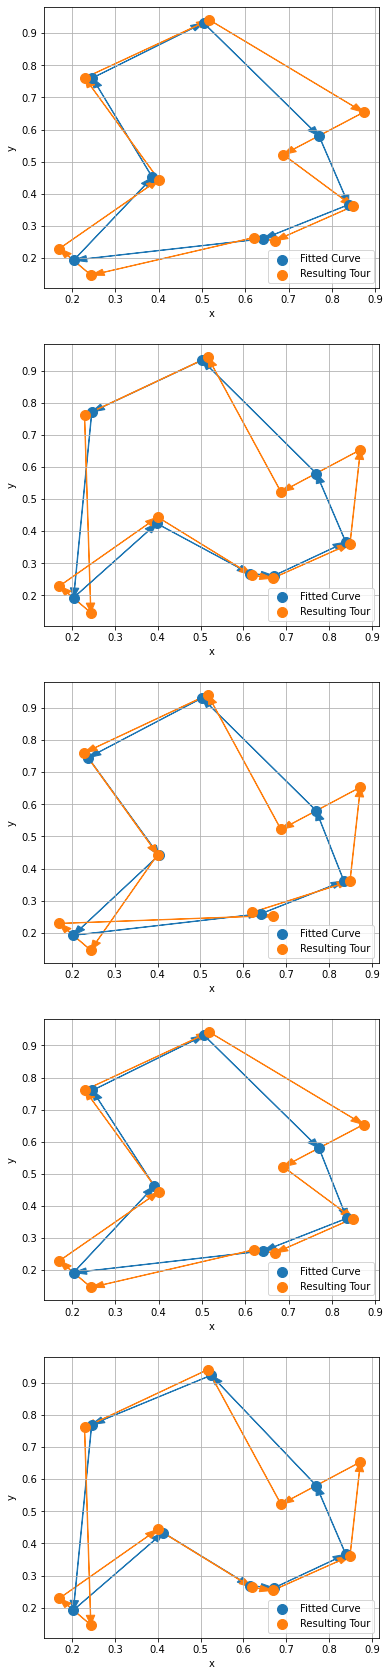

In [4]:
runs = 5

_, axes = subplots(runs, 1)

for r in range(runs):
    scores, tour, weights = som(cities,
                                outputs=10,
                                neighbourhood='cyclic',
                                neighbourhood_init=2)

    plot_tour(scores, tour, weights, axes[r])
    
plt.savefig('../figures/cyclic_tours.svg'.format(r))